In [18]:
pip install nnfs

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from nnfs.datasets import spiral_data
import nnfs
nnfs.init()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [158]:
X,y=spiral_data(samples=100, classes=3)

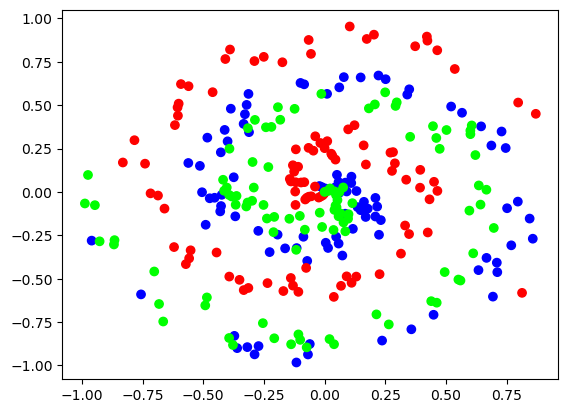

In [159]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='brg')

# Dense Layer Class

In [29]:
class dense:
    #layer initialization
    def __init__(self,n_inputs,n_neurons):
        #initialize the weights
        self.weights=0.01* np.random.randn(n_inputs,n_neurons)
        #initialize the biases
        self.biases=np.zeros((1,n_neurons))

    #forward pass
    def forward(self,inputs):
        self.output=np.dot(inputs,self.weights)+self.biases

X,y=spiral_data(samples=1000,classes=3)
dense1=dense(2,3)
dense1.forward(X)
print(dense1.output[:5])

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.78948220e-06 -1.06669340e-05 -4.09361701e-06]
 [ 1.99526366e-05 -1.56115020e-05 -7.99950431e-06]
 [ 4.67648970e-05  7.54578139e-07 -7.96354016e-06]
 [ 5.84244881e-05 -8.42126792e-06 -1.26534815e-05]]


# Relu Activation Function

In [33]:
class relu:
    def forward(self,inputs):
        self.output=np.maximum(0,inputs)

# with activation function

dense1=dense(2,3)
#activation function
active1=relu()
dense1.forward(X)
active1.forward(dense1.output)
print(active1.output[:5])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.7759529e-07 0.0000000e+00 0.0000000e+00]
 [5.5624719e-06 0.0000000e+00 0.0000000e+00]
 [2.1169535e-05 0.0000000e+00 0.0000000e+00]
 [2.4408488e-05 0.0000000e+00 0.0000000e+00]]


# Softmax Activation Function

In [36]:
class softmax:
    def forward(self,inputs):
        exp_values=np.exp(inputs-np.max(inputs,axis=1,keepdims=True))
        probabilities=exp_values/np.sum(exp_values,axis=1,keepdims=True)
        self.output=probabilities

#first dense layer
dense1=dense(2,3)
active1=relu()
dense2=dense(3,3)
active2=softmax()

#forwardpass
dense1.forward(X)
active1.forward(dense1.output)
dense2.forward(active1.output)
active2.forward(dense2.output)

print(active2.output[:5])


[[0.33333334 0.33333334 0.33333334]
 [0.33333337 0.33333325 0.33333337]
 [0.33333346 0.33333305 0.3333335 ]
 [0.33333355 0.33333275 0.33333364]
 [0.33333364 0.3333326  0.33333376]]


# Loss class

In [49]:
class loss:
    def calculate(self,output,y):
        losses=self.forward(output,y)
        loss=np.mean(losses)
        return loss

In [69]:
class crosscategoricalentropy:
    def forward(self,y_pred,y_true):
        samples=len(y_pred)
        y_clip=np.clip(y_pred,1e-7,1-1e-7)
        if len(y_true.shape)==1:
            correct_con=y_clip[
            range(samples),y_true
            ]
        elif len(y_true.shape)==2:
            correct_con=np.sum(
                y_clip*y_true,axis=1
            )
        #loss
        negative_log_likelihoods = -np.log(correct_con)
        return negative_log_likelihoods
        
    def calculate(self, y_pred, y_true):
        losses = self.forward(y_pred, y_true)
        return np.mean(losses)

dense1=dense(2,3)
active1=relu()
dense2=dense(3,3)
active2=softmax()
loss_Fun=crosscategoricalentropy()
#forward pass

dense1.forward(X)
active1.forward(dense1.output)
dense2.forward(active1.output)
active2.forward(dense2.output)
print(active2.output[:5])
#function call

losses=loss_Fun.calculate(active2.output,y)
print("Loss:",losses)

predict=np.argmax(active2.output,axis=1)
if len(y.shape)==2:
    y=np.argmax(y,axis=1)
accu=np.mean(predict==y)
print("Accuracy:",accu)



[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]
Loss: 1.0986149
Accuracy: 0.33


# Backpropagation

In [116]:
# class dense activation function with both forward and backward passes
class Dense:
    def __init__(self,n_inputs,n_neurons):
        self.weights=0.01*np.random.randn(n_inputs,n_neurons)
        self.biases=np.zeros((1,n_neurons))
    # dense layer forward pass
    def forward(self,inputs):
        self.input=inputs
        self.output=np.dot(inputs,self.weights)+self.biases
    # dense layer backward pass
    def backward(self,dvalues):
        self.dweights=np.dot(self.input.T,dvalues)
        self.dbiases=np.sum(dvalues,axis=0,keepdims=True)
        self.dinputs=np.dot(dvalues,self.weights.T)
        

In [162]:

# class relu activation function with both forward and backward passes
class ReLU:
    def forward(self, inputs):
        self.inputs = inputs 
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

class softmax:
    def forward(self, inputs):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        
        self.output = probabilities

class loss:
    def calculate(self,output,y):
        sample_losses=self.forward(output,y)
        data_loss=np.mean(sample_losses)
        return data_loss

class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples

In [125]:
class Softmax_CategoricalCrossentropy:
    def __init__(self):
        self.activation =softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        self.activation.forward(inputs)
        self.output = self.activation.output
        return self.loss.calculate(self.output, y_true)

    # Backward pass
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        self.dinputs = dvalues.copy()
        self.dinputs[range(samples), y_true] -= 1
        self.dinputs = self.dinputs / samples

# Neural network with backward and forward passes

In [160]:
X,y=spiral_data(samples=100,classes=3)
#1st layer of dense and relu activation
dense1=Dense(2,3)
active1=relu()

#2nd layer of dense and softmax activation
dense2=Dense(3,3)
active2=softmax()
loss_function = Loss_CategoricalCrossentropy()

#forward passes
dense1.forward(X)
active1.forward(dense1.output)
dense2.forward(active1.output)
active2.forward(dense2.output)

print(active2.output[:5])

loss=loss_function.forward(active2.output,y)
print('Loss',active2.output[:5])

predict=np.argmax(active2.output,axis=1)
if len(y.shape)==2:
    y=np.argmax(y,axis=1)
accuracy=np.mean(predict==y)
print("Accuracy:",accuracy)

loss_function.backward(active2.output,y)
dense2.backward(loss_function.dinputs)
active1.backward(dense2.dinputs)
dense1.backward(active1.dinputs)

print(dense1.dweights)
print(dense1.dbiases)
print(dense2.dweights)
print(dense2.dbiases)

[[0.33333334 0.33333334 0.33333334]
 [0.33333337 0.3333337  0.33333287]
 [0.33333346 0.33333436 0.33333215]
 [0.33333358 0.33333552 0.33333087]
 [0.33333334 0.33333334 0.33333334]]
Loss [[0.33333334 0.33333334 0.33333334]
 [0.33333337 0.3333337  0.33333287]
 [0.33333346 0.33333436 0.33333215]
 [0.33333358 0.33333552 0.33333087]
 [0.33333334 0.33333334 0.33333334]]
Accuracy: 0.37666666666666665
[[ 0.00115336 -0.00668087 -0.00239579]
 [ 0.00185128  0.00053762  0.00032278]]
[[-0.00555821  0.01851425  0.00720237]]
[[-0.00149105 -0.00128364 -0.00185748]
 [-0.0022718  -0.00300008 -0.00257334]
 [-0.00267914 -0.00353457 -0.00303882]]
[[-0.99997765 -0.999955   -1.000061  ]]


# Gradient Descent Optimizer

In [136]:
class sgd:
    def __init__(self,learning_rate=0.5):
        self.learning_rate=learning_rate
    def update_param(self,layer):
        layer.weights+=-self.learning_rate*layer.dweights
        layer.biases+=-self.learning_rate*layer.dbiases

In [163]:
dense1=Dense(2,64)
active1=relu()

#2nd layer of dense and softmax activation
dense2=Dense(64,3)
loss_function =Softmax_CategoricalCrossentropy()
optimizer=sgd()

for epoch in range(10001):
    dense1.forward(X)
    active1.forward(dense1.output)
    dense2.forward(active1.output)
    loss=loss_function.forward(dense2.output,y)


    predict=np.argmax(loss_function.output,axis=1)
    if len(y.shape)==2:
        y=np.argmax(y,axis=1)
    accuracy=np.mean(predict==y)
    if not epoch%100:
        print(f'epoch: {epoch},'+
                f'acc:{accuracy:.3f}'+
                f'loss:{loss:.3f}')
        

    loss_function.backward(active2.output,y)
    dense2.backward(loss_function.dinputs)
    active1.backward(dense2.dinputs)
    dense1.backward(active1.dinputs)

    optimizer.update_param(dense1)
    optimizer.update_param(dense2)

epoch: 0,acc:0.297loss:1.099
epoch: 100,acc:0.423loss:1.096
epoch: 200,acc:0.417loss:1.099
epoch: 300,acc:0.400loss:6.464
epoch: 400,acc:0.383loss:9.759
epoch: 500,acc:0.380loss:9.993
epoch: 600,acc:0.363loss:10.262
epoch: 700,acc:0.357loss:10.369
epoch: 800,acc:0.360loss:10.316
epoch: 900,acc:0.350loss:10.477
epoch: 1000,acc:0.357loss:10.369
epoch: 1100,acc:0.357loss:10.369
epoch: 1200,acc:0.363loss:10.262
epoch: 1300,acc:0.380loss:9.993
epoch: 1400,acc:0.380loss:9.993
epoch: 1500,acc:0.377loss:10.047
epoch: 1600,acc:0.370loss:10.154
epoch: 1700,acc:0.373loss:10.101
epoch: 1800,acc:0.367loss:10.208
epoch: 1900,acc:0.367loss:10.208
epoch: 2000,acc:0.367loss:10.208
epoch: 2100,acc:0.367loss:10.208
epoch: 2200,acc:0.367loss:10.208
epoch: 2300,acc:0.367loss:10.208
epoch: 2400,acc:0.367loss:10.208
epoch: 2500,acc:0.367loss:10.208


C:\Users\Akshata Pandit\AppData\Local\Temp\ipykernel_58692\3189094448.py:14: RuntimeWarning: overflow encountered in subtract
  exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
C:\Users\Akshata Pandit\AppData\Local\Temp\ipykernel_58692\3189094448.py:14: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))


epoch: 2600,acc:0.357loss:nan
epoch: 2700,acc:0.367loss:nan
epoch: 2800,acc:0.333loss:nan
epoch: 2900,acc:0.333loss:nan
epoch: 3000,acc:0.333loss:nan
epoch: 3100,acc:0.333loss:nan
epoch: 3200,acc:0.333loss:nan
epoch: 3300,acc:0.333loss:nan
epoch: 3400,acc:0.333loss:nan
epoch: 3500,acc:0.333loss:nan
epoch: 3600,acc:0.333loss:nan
epoch: 3700,acc:0.333loss:nan
epoch: 3800,acc:0.333loss:nan
epoch: 3900,acc:0.333loss:nan
epoch: 4000,acc:0.333loss:nan
epoch: 4100,acc:0.333loss:nan
epoch: 4200,acc:0.333loss:nan
epoch: 4300,acc:0.333loss:nan
epoch: 4400,acc:0.333loss:nan
epoch: 4500,acc:0.333loss:nan
epoch: 4600,acc:0.333loss:nan
epoch: 4700,acc:0.333loss:nan
epoch: 4800,acc:0.333loss:nan
epoch: 4900,acc:0.333loss:nan


C:\Users\Akshata Pandit\AppData\Local\Temp\ipykernel_58692\1376859590.py:9: RuntimeWarning: overflow encountered in add
  self.output=np.dot(inputs,self.weights)+self.biases


epoch: 5000,acc:0.333loss:nan
epoch: 5100,acc:0.333loss:nan
epoch: 5200,acc:0.333loss:nan
epoch: 5300,acc:0.333loss:nan
epoch: 5400,acc:0.333loss:nan
epoch: 5500,acc:0.333loss:nan
epoch: 5600,acc:0.333loss:nan
epoch: 5700,acc:0.333loss:nan
epoch: 5800,acc:0.333loss:nan
epoch: 5900,acc:0.333loss:nan
epoch: 6000,acc:0.333loss:nan
epoch: 6100,acc:0.333loss:nan
epoch: 6200,acc:0.333loss:nan
epoch: 6300,acc:0.333loss:nan
epoch: 6400,acc:0.333loss:nan
epoch: 6500,acc:0.333loss:nan
epoch: 6600,acc:0.333loss:nan
epoch: 6700,acc:0.333loss:nan
epoch: 6800,acc:0.333loss:nan
epoch: 6900,acc:0.333loss:nan
epoch: 7000,acc:0.333loss:nan
epoch: 7100,acc:0.333loss:nan
epoch: 7200,acc:0.333loss:nan
epoch: 7300,acc:0.333loss:nan
epoch: 7400,acc:0.333loss:nan
epoch: 7500,acc:0.333loss:nan
epoch: 7600,acc:0.333loss:nan
epoch: 7700,acc:0.333loss:nan
epoch: 7800,acc:0.333loss:nan
epoch: 7900,acc:0.333loss:nan
epoch: 8000,acc:0.333loss:nan
epoch: 8100,acc:0.333loss:nan
epoch: 8200,acc:0.333loss:nan
epoch: 830

# Learning Rate Decay

In [143]:
class sgd_decay:
    def __init__(self,learning_rate=1,decay=0):
        self.learning_rate=learning_rate
        self.current_rate=learning_rate
        self.decay=decay
        self.iterations=0

    def pre_update(self):
        if self.decay:
            self.current_rate=self.learning_rate*\
                (1 / (1+self.decay*self.iteration))
            
    def update(self,layer):
        layer.weights+=-self.current_rate*layer.dweights
        layer.biases+=-self.current_rate*layer.dbiases

    def post_update(self):
        self.iterations+=1

In [151]:
dense1=Dense(2,64)
active1=relu()

#2nd layer of dense and softmax activation
dense2=Dense(64,3)
loss_function =Softmax_CategoricalCrossentropy()
optimizer=sgd_decay()

for epoch in range(10001):
    dense1.forward(X)
    active1.forward(dense1.output)
    dense2.forward(active1.output)
    loss=loss_function.forward(dense2.output,y)


    predict=np.argmax(loss_function.output,axis=1)
    if len(y.shape)==2:
        y=np.argmax(y,axis=1)
    accuracy=np.mean(predict==y)
    if not epoch%100:
        print(f'epoch: {epoch},'+
                f'acc:{accuracy:.3f}'+
                f'loss:{loss:.3f}')
        

    loss_function.backward(active2.output,y)
    dense2.backward(loss_function.dinputs)
    active1.backward(dense2.dinputs)
    dense1.backward(active1.dinputs)

    optimizer.pre_update()
    optimizer.update(dense1)
    optimizer.update(dense2)
    optimizer.post_update()

epoch: 0,acc:0.328loss:1.099
epoch: 100,acc:0.418loss:1.093
epoch: 200,acc:0.375loss:9.972
epoch: 300,acc:0.352loss:10.445
epoch: 400,acc:0.346loss:10.541
epoch: 500,acc:0.362loss:10.283
epoch: 600,acc:0.378loss:10.025
epoch: 700,acc:0.375loss:10.068
epoch: 800,acc:0.373loss:10.111
epoch: 900,acc:0.371loss:10.133
epoch: 1000,acc:0.369loss:10.165
epoch: 1100,acc:0.368loss:10.187
epoch: 1200,acc:0.368loss:10.187
epoch: 1300,acc:0.367loss:10.197


C:\Users\Akshata Pandit\AppData\Local\Temp\ipykernel_58692\510338935.py:13: RuntimeWarning: overflow encountered in subtract
  exp=np.exp(inputs-np.max(inputs,axis=1,keepdims=True))
C:\Users\Akshata Pandit\AppData\Local\Temp\ipykernel_58692\510338935.py:13: RuntimeWarning: invalid value encountered in subtract
  exp=np.exp(inputs-np.max(inputs,axis=1,keepdims=True))


epoch: 1400,acc:0.367loss:10.197
epoch: 1500,acc:0.333loss:nan
epoch: 1600,acc:0.333loss:nan
epoch: 1700,acc:0.333loss:nan
epoch: 1800,acc:0.333loss:nan
epoch: 1900,acc:0.333loss:nan
epoch: 2000,acc:0.333loss:nan
epoch: 2100,acc:0.333loss:nan
epoch: 2200,acc:0.333loss:nan
epoch: 2300,acc:0.333loss:nan
epoch: 2400,acc:0.333loss:nan
epoch: 2500,acc:0.333loss:nan
epoch: 2600,acc:0.333loss:nan


C:\Users\Akshata Pandit\AppData\Local\Temp\ipykernel_58692\1376859590.py:9: RuntimeWarning: overflow encountered in add
  self.output=np.dot(inputs,self.weights)+self.biases


epoch: 2700,acc:0.333loss:nan
epoch: 2800,acc:0.333loss:nan
epoch: 2900,acc:0.333loss:nan
epoch: 3000,acc:0.333loss:nan
epoch: 3100,acc:0.333loss:nan
epoch: 3200,acc:0.333loss:nan
epoch: 3300,acc:0.333loss:nan
epoch: 3400,acc:0.333loss:nan
epoch: 3500,acc:0.333loss:nan
epoch: 3600,acc:0.333loss:nan
epoch: 3700,acc:0.333loss:nan
epoch: 3800,acc:0.333loss:nan
epoch: 3900,acc:0.333loss:nan
epoch: 4000,acc:0.333loss:nan
epoch: 4100,acc:0.333loss:nan
epoch: 4200,acc:0.333loss:nan
epoch: 4300,acc:0.333loss:nan
epoch: 4400,acc:0.333loss:nan
epoch: 4500,acc:0.333loss:nan
epoch: 4600,acc:0.333loss:nan
epoch: 4700,acc:0.333loss:nan
epoch: 4800,acc:0.333loss:nan
epoch: 4900,acc:0.333loss:nan
epoch: 5000,acc:0.333loss:nan
epoch: 5100,acc:0.333loss:nan
epoch: 5200,acc:0.333loss:nan
epoch: 5300,acc:0.333loss:nan
epoch: 5400,acc:0.333loss:nan
epoch: 5500,acc:0.333loss:nan
epoch: 5600,acc:0.333loss:nan
epoch: 5700,acc:0.333loss:nan
epoch: 5800,acc:0.333loss:nan
epoch: 5900,acc:0.333loss:nan
epoch: 600

In [156]:
class Optimizer_SGD:
    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    # Call once before any parameter updates
    def pre_update(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update(self, layer):
        if self.momentum:
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)
            weight_updates = self.momentum * layer.weight_momentums - \
                             self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates
            bias_updates = self.momentum * layer.bias_momentums - \
                           self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates
        else:
            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates = -self.current_learning_rate * layer.dbiases
        layer.weights += weight_updates
        layer.biases += bias_updates
    def post_update(self):
        self.iterations += 1


In [157]:
dense1=Dense(2,64)
active1=relu()

#2nd layer of dense and softmax activation
dense2=Dense(64,3)
loss_function =Softmax_CategoricalCrossentropy()
optimizer=Optimizer_SGD()

for epoch in range(10001):
    dense1.forward(X)
    active1.forward(dense1.output)
    dense2.forward(active1.output)
    loss=loss_function.forward(dense2.output,y)


    predict=np.argmax(loss_function.output,axis=1)
    if len(y.shape)==2:
        y=np.argmax(y,axis=1)
    accuracy=np.mean(predict==y)
    if not epoch%100:
        print(f'epoch: {epoch},'+
                f'acc:{accuracy:.3f}'+
                f'loss:{loss:.3f}')
        

    loss_function.backward(active2.output,y)
    dense2.backward(loss_function.dinputs)
    active1.backward(dense2.dinputs)
    dense1.backward(active1.dinputs)

    optimizer.pre_update()
    optimizer.update(dense1)
    optimizer.update(dense2)
    optimizer.post_update()

epoch: 0,acc:0.286loss:1.099
epoch: 100,acc:0.412loss:1.082
epoch: 200,acc:0.397loss:9.626
epoch: 300,acc:0.395loss:9.757
epoch: 400,acc:0.391loss:9.821
epoch: 500,acc:0.388loss:9.864
epoch: 600,acc:0.387loss:9.875
epoch: 700,acc:0.388loss:9.864
epoch: 800,acc:0.389loss:9.843
epoch: 900,acc:0.387loss:9.886
epoch: 1000,acc:0.380loss:9.993
epoch: 1100,acc:0.376loss:10.058
epoch: 1200,acc:0.373loss:10.101
epoch: 1300,acc:0.361loss:10.294
epoch: 1400,acc:0.354loss:10.412


C:\Users\Akshata Pandit\AppData\Local\Temp\ipykernel_58692\510338935.py:13: RuntimeWarning: overflow encountered in subtract
  exp=np.exp(inputs-np.max(inputs,axis=1,keepdims=True))
C:\Users\Akshata Pandit\AppData\Local\Temp\ipykernel_58692\510338935.py:13: RuntimeWarning: invalid value encountered in subtract
  exp=np.exp(inputs-np.max(inputs,axis=1,keepdims=True))


epoch: 1500,acc:0.334loss:nan
epoch: 1600,acc:0.333loss:nan
epoch: 1700,acc:0.333loss:nan
epoch: 1800,acc:0.333loss:nan
epoch: 1900,acc:0.333loss:nan
epoch: 2000,acc:0.333loss:nan
epoch: 2100,acc:0.333loss:nan
epoch: 2200,acc:0.333loss:nan
epoch: 2300,acc:0.333loss:nan
epoch: 2400,acc:0.333loss:nan
epoch: 2500,acc:0.333loss:nan
epoch: 2600,acc:0.333loss:nan


C:\Users\Akshata Pandit\AppData\Local\Temp\ipykernel_58692\1376859590.py:9: RuntimeWarning: overflow encountered in add
  self.output=np.dot(inputs,self.weights)+self.biases


epoch: 2700,acc:0.333loss:nan
epoch: 2800,acc:0.333loss:nan
epoch: 2900,acc:0.333loss:nan
epoch: 3000,acc:0.333loss:nan
epoch: 3100,acc:0.333loss:nan
epoch: 3200,acc:0.333loss:nan
epoch: 3300,acc:0.333loss:nan
epoch: 3400,acc:0.333loss:nan
epoch: 3500,acc:0.333loss:nan
epoch: 3600,acc:0.333loss:nan
epoch: 3700,acc:0.333loss:nan
epoch: 3800,acc:0.333loss:nan
epoch: 3900,acc:0.333loss:nan
epoch: 4000,acc:0.333loss:nan
epoch: 4100,acc:0.333loss:nan
epoch: 4200,acc:0.333loss:nan
epoch: 4300,acc:0.333loss:nan
epoch: 4400,acc:0.333loss:nan
epoch: 4500,acc:0.333loss:nan
epoch: 4600,acc:0.333loss:nan
epoch: 4700,acc:0.333loss:nan
epoch: 4800,acc:0.333loss:nan
epoch: 4900,acc:0.333loss:nan
epoch: 5000,acc:0.333loss:nan
epoch: 5100,acc:0.333loss:nan
epoch: 5200,acc:0.333loss:nan
epoch: 5300,acc:0.333loss:nan
epoch: 5400,acc:0.333loss:nan
epoch: 5500,acc:0.333loss:nan
epoch: 5600,acc:0.333loss:nan
epoch: 5700,acc:0.333loss:nan
epoch: 5800,acc:0.333loss:nan
epoch: 5900,acc:0.333loss:nan
epoch: 600

In [164]:
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples


In [165]:
# Common loss class
class Loss:
 # Calculates the data and regularization losses
 # given model output and ground truth values
 def calculate(self, output, y):
  # Calculate sample losses
  sample_losses = self.forward(output, y)
  # Calculate mean loss
  data_loss = np.mean(sample_losses)
  # Return loss
  return data_loss

In [ ]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)



In [166]:
# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy:
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples


In [167]:
# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify the original variable,
        # let’s make a copy of values first
        self.dinputs = dvalues.copy()
        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


In [168]:
# Softmax activation
class Activation_Softmax:
 # Forward pass
 def forward(self, inputs):
 # Get unnormalized probabilities
  exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
 # Normalize them for each sample
  probabilities = exp_values / np.sum(exp_values, axis=1,keepdims=True)
  self.output = probabilities

In [169]:
# Common loss class
class Loss:
 # Calculates the data and regularization losses
 # given model output and ground truth values
 def calculate(self, output, y):
  # Calculate sample losses
  sample_losses = self.forward(output, y)
  # Calculate mean loss
  data_loss = np.mean(sample_losses)
  # Return loss
  return data_loss

In [170]:
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples

In [171]:
# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy:
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples

In [172]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(3, 3)
# Create Softmax classifier’s combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
# Perform a forward pass of our training data through this layer
dense1.forward(X)
# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)
# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y)

# Let’s see output of the first few samples:
print(loss_activation.output[:5])
# Print loss value
print('loss:', loss)
# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(y.shape) == 2:
 y = np.argmax(y, axis=1)
accuracy = np.mean(predictions == y)
# Print accuracy
print('acc:', accuracy)
# Backward pass
loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)
# Print gradients
print(dense1.dweights)
print(dense1.dbiases)
print(dense2.dweights)
print(dense2.dbiases)

NameError: name 'Layer_Dense' is not defined